# Regresion Logistica
El objetivo, por ahora es:

* Hallar una funcion de costo (esta clase)
* El gradiente de la funcion de costo.
* Resolver el problema de optimizacion.

Pensemos en un problema practico de determinar si una persona tiene o no cancer.

$$p(q_i \text{ tiene cancer} | x_i, \Theta) \ge \text{umbral} .$$

Por ejemplo si el umbral es $0.5$, entonces se dice que ser tiene cancer con una posibilidad de mas del 50\%.

Vamos a mencionar varios puntos:

* El rango de $h(\Theta)$ como lo tenemos hasta el momento es continuo.

* $h(\Theta)$ no produce valores que sean faciles de interpretar desde el punto de vista de la clasificacion.

Pensando en la regresion lineal en el plano. Ajustar una recta.
Por ejemplo, si quisieramos una probabilidad (incierta) tal como

$$p_{bobita} = p_{bobita}(y = 1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x .$$
A parte de ser una funcion continua, tiene rango en $(-\infty, \infty)$.  Debemos buscar otra estrategia.

Existe una medida llamada **chance** (**odds**). Esta representa
el numero de casos ganados sobre el numero de casos perdidos.

Por ejemplo, si en un juego yo gando 3 y pierdo 2, el chance es
$3/2$. Hay alguna relacion entre el chance y la probabilidad.
Por ejemplo, si la probabilidad de $p=P(y, | \theta ,x )$ entonces
la probabildad contraria es $1-p$, (las probabilidades suman 1 y son independientes). En este caso es justo definir el chance como

$$ \text{chance} = \frac{p}{1-p} = \frac{\text{probabilidad de ganar}}{\text{probabilidad de perder}} .$$

Todavia no estamos donde queremos. El chance, tambien es continuo (esto no es problema grave por que se puede discretizar) pero
el chance

* Esta en el rango $[0, \infty)$.
* No hay simetrica. En que sentido? uno quisiera que el chance fuera positivo si las posibilidades de ganar son mas que las de perder y negativo en caso contrario.

A alguien se le ocurrio tomar el logaritmo del chance. Es decir


$$ \log \frac{p}{1-p} .$$
Esta expresion es simetrica, el chance de ganar es el negativo del chance de perder, esta en el rango $(-\infty, \infty)$ (esto no es muy bueno, pero le buscamos remedio). Veamos la simetria.


$$ \log \frac{p}{1-p} = \log p - \log(1-p) = -[\log(1-p) - \log p] = - \log \frac{1-p}{p} .$$

Qusieramos ajustar esta nueva variable "chance" a una recta.
Es decir

$$ \log \frac{p}{1 - p} = \theta_0 + \theta_1 x .$$
A este "fitting" se le llama **regression logistica**.

Vamos a buscar $p$ como funcion de $y= \theta_0 + \theta_1 x$.

\begin{eqnarray}
\log \frac{p}{1 - p} &=& y \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1-p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
p &=& \frac{\mathrm{e}^y}{1 + \mathrm{e}^y} \\
p &=& \frac{1}{1 + \mathrm{e}^{-y}} \tag{1}
\end{eqnarray}

En particular queremos hallar $\theta_0, \theta_1$ que se ajusten
a

$$ p = \frac{1}{1 + \mathrm{e}^{-\theta_0 - \theta_1 x}} .$$

A la funcion (1) se le conoce como la funcion **logistica** , o  **sigmoid logistica**. Esta funcion es importante (se usa como activacion en redes neuronales, etc). Veamos algunas propiedades.

* La llamos $S(t)$:
$$ S(t) = \frac{1}{1 + \mathrm{e}^{-t}},  $$
donde $t= X \theta$ ($X=(1,x)^T$, $\theta=(\theta_0, \theta_1)$,
$t=\theta_0 + \theta_1 x$.


* La derivada:
$$ S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2(t) . \tag{2.0}$$

* Otra forma, util de la derivada
$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2}
= \frac{1}{1 + \mathrm{e}^{-t}}  
\frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}} = \frac{1}{1 + \mathrm{e}^{-t}}  \left (  1 - \frac{1}{1 + \mathrm{e}^{-t}}   \right ) .$$

Es decir
$$S'(t) = S(t) (1 - S(t)) \tag{2}. $$




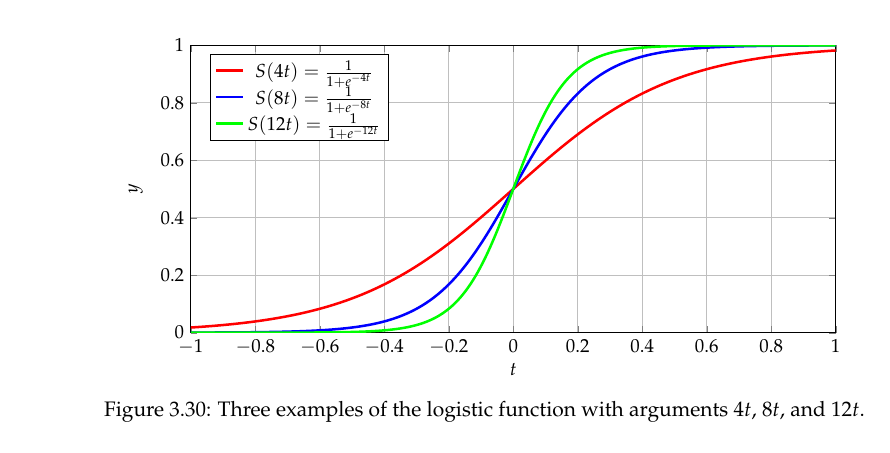

Creamos una hipotesis basada en esta regresion logistica. Esta es:


$$h(\Theta, x^{(i)}) = S( x^{(i)} \Theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}}  \tag{3} .$$

Queremos intepretar esta hipotesis como una probabilidad. Es decir,

Asumimos que los $Y^{(i)}$ solo toman dos valores. O 0, o 1.
$$ h(\Theta, x^{(i)}) = p( Y^{(i)} = 1 | x^{(i)}, \Theta)  .$$

$$  p( Y^{(i)} = 0 | x^{(i)}, \Theta)=1 -   p( Y^{(i)} = 1 | x^{(i)}, \Theta)  .$$

La funcion (3) **no es binaria**. Que hacemos aca? Podemos
definir una hipotesis binaria:



\begin{eqnarray}
h_{binaria}(\Theta, x^{(i)}) = \left \{
    \begin{array}{cc}
    1 & \text{ si } S(x^{(i)} \Theta) > \gamma \\
    0 & \text{ si } S(x^{(i)} \Theta) \le \gamma
    \end{array}
    \right .
\end{eqnarray}
donde $\gamma$ es un umbral (entre 0  y 1). Por ejemplo $\gamma=0.5.$

## Funcion de costo para la regresion logistica.

Quisiera definir algo como

$$J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m [ h_i(\theta, X) - Y_i) ]^2.$$

El problema con esta funcion, es que no es convexa (cuando $h(\theta, X)$ es la sigmoid function. La convexidad es algo util en minimizacion (la optimizacion).

Veamos por que. Tomemos solo una muestra con $Y_i=1$, y el argumento de la sigmoid es $1 + \theta$, con esto tenemos una funcion de costo simple que es:


$$ J(\theta) = \frac12 ( S(1 + \theta) - 1)^2.$$
Si yo muestro que esta funcion no es convexa, es suficiente.

Una forma de ver que una funcion es convexa es tomando la segunda derivada y ver que es toda positiva.

Recuerde la propiedad (2.0).

$$ S'(t) = \mathrm{e}^{-t} S^2(t). $$

Tomemos la primera derivada de $J$.

$$ \frac{d J(\theta)}{d \theta} = (S(1+ \theta) -1) \mathrm{e}^{-1 - \theta} S^2 (1 + \theta) = -\mathrm{e}^{-1-\theta} S^2(1 + \theta)  + S^3(1 + \theta) \mathrm{e}^{-1 - \theta} .$$







Para la segunda derivada

$$ \frac{d^2 J(\theta)}{d \theta^2} = \mathrm{e}^{-1 - \theta} S^2(1 + \theta) - 2 S^3(1 + \theta) \mathrm{e}^{-2 - 2 \theta} + 3 S^4(1 + \theta) \mathrm{e}^{-2 - 2 \theta} - S^3(1 + \theta) \mathrm{e}^{-1 - \theta}.$$

Sacamos factor comun: $\mathrm{e}^{-1-\theta} S^2( 1 + \theta)$ y obtenemos

$$ \frac{d^2 J(\theta)}{d \theta^2} = \mathrm{e}^{-1 - \theta} S^2(1 + \theta) \left [ 1 - 2 S(1 + \theta) \mathrm{e}^{-1 - \theta} + 3 S^2(1 + \theta) \mathrm{e}^{-1- \theta} - S(1 + \theta)
    \right ] .$$

Analiticamente es dificil ver si esto es positivo o negativo.
Yo hice la grafica en Python.





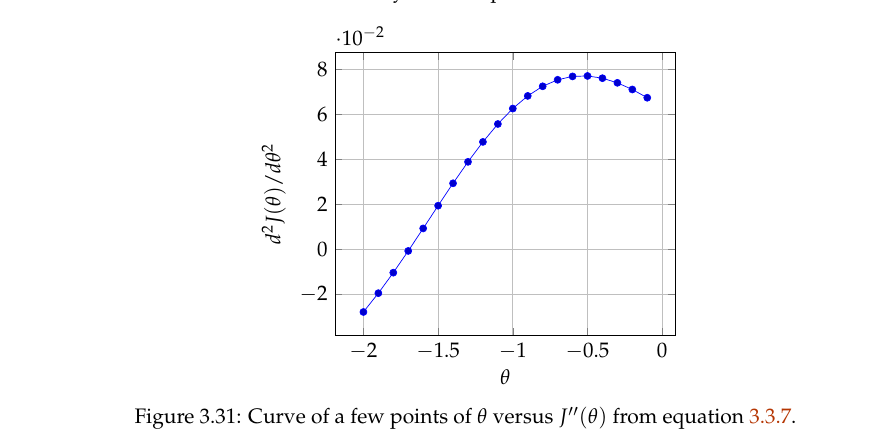

La grafica tiene valores positivos y negativos, o sea que no es ni concava, ni convexa.

Vamos a construir otra funcion de costo usando el principio de verosimilitud (likelihood).


Asuma que lo queremos clasificar son perros y gatos. Que la probabilidad de una imagen de ser gato esta dada por


$$ p(y_i = \text{gato} | x^{(i)}, \theta)  .$$
Y para este caso la siguiente hipotesis.
$$ h(\theta, x^{(i)}) = p(y_i = \text{gato} | x^{(i)}, \theta)= S( x^{(i)} \theta)  .$$

Entonces que pasa si $y_i=\text{perro}$, como solo hay perros y gatos, una muestra o es gato o es perro pero no dos.

$$ p( y_i = \text{perro} | x^{(i)}; \theta) = 1 - p(y_i = \text{gato}  | x^{(i)} ; \theta) = 1 - h(\theta, x^{(i)})  .$$



Estas dos situaciones se pueden combinar en una sola:


$$p(y_i | x^{(i)}; \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1-y_i} .$$
Digamos que $y_i=1$ para gato y $y_i=0$ para perro.




A este tipo de clasificacion (binaria) se le llama experimento de Bernoulli y da lugar a la distribucion binomial en probabilidades.

Todo esto que analizamos es solo para una muetra. Consideremos entonces un monton. $m$ muestras. Las muestras son experimentos independientes. O es gato, o es perro.

Definimos a la probabilidad total del conjunto como el Likelihood (verosimilitud)


$$\mathcal{L}(\theta) = p(Y | X; \theta) = \prod_{i=1}^m \log h(\theta, x^{(i)})^{y_i} \log (1 - h(\theta, x^{(i)})^{1 - y_i}  .$$

Desde el punto de vista de optimizacion queremos maximiar el "likelihood"

Este se ve como una buena candidata para funcion funcion de costo.
Pero las productorias no son buenas para el calculo (el gradiente).

Entonces se usa el logaritmo, por que convierte multiplicaciones en sumas.



$$\log\mathcal{L}(\theta) = p(Y | X; \theta) = \sum_{i=1}^m y_i  \log h ( \theta, x^{(i)}) + (1 - y_i) \log (1 - h(\theta, x^{(i)}) . $$




Maximizar esta funcion es un buen objetivo, por que incrementa las probabilidades de que un bebe en un juego de loteria de gatos y perros halla obtenido los mejores resultados en terminos de probabilidades al escoger casi correctamente entre gatos y perros.

Nosotros, en nuestra tecnica queremos minimizar, no maximizar. Pero esto simple, se niega el signo y tenemos

$$J(\theta) = -\frac1m \log\mathcal{L}(\theta) = -\frac1m p(Y | X; \theta) = -\frac1m \sum_{i=1}^m y_i h (
\theta, x^{(i)}) + (1 - y_i) (1 - h(\theta, x^{(i)}) . $$


Es decir
$$J(\theta) =-\frac1m \sum_{i=1}^m  y_i h(
\theta, x^{(i)}) + (1 - y_i) (1 - h(\theta, x^{(i)})) . $$

Esta es la funcion objetivo para regresion logistica.
Se deja como prueba al estudiante verificar que esta funcion es convexa.

